# Tarea 1
### INF335 - Tecnologías de Búsqueda en la Web

## Integrantes:

* Margarita Bugueño - 201373510-k
* Fabián Fernandez  -  201373539-8
* Francisco Mena    -  201373504-5

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as plt
import nltk
import re

archivo = "amazon-fine-foods/Reviews.csv"
Dataset = pd.read_csv(archivo)

Reviews = Dataset.Text
Reviews.shape

(568454,)

In [2]:
Reviews.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

El dataset corresponde a críticas realizadas por distintos usuarios de Amazon a comidas o restorants provenientes de esta empresa, donde las filas corresponden 568454 usuarios y la única columna extraída consta de la crítica o *review* realizada sobre algún plato o comida en especial, o en general sobre el contexto de comidas de Amazon.  
Este dataset será utilizado para realizar procesamiento de lenguaje natural sobre las críticas en texto, con distintas herramientas provenientes de librerías de Python.

In [2]:
Corpus_lista = []
for review in Reviews:
    Corpus_lista.append(review)

En la celda anterior se crea el *corpus* que almacenará todas las críticas (*reviews*) en una lista de estas.

## Preprocesamiento

A continuación el primer preprocesamiento sobre el Corpus completo será el de eliminar etiquetas html contenidas dentro de las críticas, ya que existen usuarios que para ellas utilizaron herramientas de edición del lenguaje personalizada, tales como saltos de líneas (código **br**) y links a otros sitios web (código **a href**).

In [3]:
from bs4 import BeautifulSoup
from ehp import *

html = Html()

Corpus_preprocesado = []
for documento in Corpus_lista:
    Corpus_preprocesado.append(html.feed(documento).text())

    #Corpus_preprocesado.append(BeautifulSoup(documento.decode('utf-8','ignore')).get_text())

Se cambió la librería utilizada para eliminar las etiquetas html debido a que se demora mucho en procesar con la librería **BeautifulSoup**, por lo que se utilizó una librería auxiliar llamada **ehp** (Easy Html Parser), la cual *parsea* de una forma más eficiente en términos de computación.

In [4]:
Corpus_preprocesado = [documento.lower() for documento in Corpus_preprocesado]

En la celda anterior, cada palabra de las criticas pertenecientes al corpus es transformada a minúsculas. Este preprocesamiento es necesario para tener un formato neutro y evitar la duplicidad de palabras.

Luego, se tokeniza el Corpus completo, esto significa que el Corpus se divide por términos y se almacena en una lista. Este paso es necesario para la siguiente operación de eliminar las palabras sin significado por sí solas (**stopwords**). Estas palabras, que son frecuentemente utilizadas por los usuarios, se eliminan para no ser consideradas y no afecten al análisis léxico del Corpus.   

Cabe destacar que esta operación es la más costosa en términos computacionales, ya que va término a término comparando si está dentro del conjunto de las stopwords, el orden computacional sería del producto de la cantidad de tokens detectados por la cantidad de stopwords.

In [5]:
#se tokeniza por documento
Corpus_tokenizado = []
for documento in Corpus_preprocesado:
    Corpus_tokenizado.append(nltk.word_tokenize(documento.decode('utf-8','ignore')))
print Corpus_tokenizado[0]

[u'i', u'have', u'bought', u'several', u'of', u'the', u'vitality', u'canned', u'dog', u'food', u'products', u'and', u'have', u'found', u'them', u'all', u'to', u'be', u'of', u'good', u'quality', u'.', u'the', u'product', u'looks', u'more', u'like', u'a', u'stew', u'than', u'a', u'processed', u'meat', u'and', u'it', u'smells', u'better', u'.', u'my', u'labrador', u'is', u'finicky', u'and', u'she', u'appreciates', u'this', u'product', u'better', u'than', u'most', u'.']


En primer lugar se *tokeniza* por documento (review/critica), quedando cada documento separado por término como se muestra en la celda anterior.

In [6]:
from nltk.corpus import stopwords

#se eliminan stopwords
stoplist = stopwords.words('english')

Corpus_sin_stopwords = []
for documento in Corpus_tokenizado:
    #se eliminan los stopword de cada documento
    token_sin_stopwords = [ token for token in documento  if token not in stoplist ]
    Corpus_sin_stopwords.append(token_sin_stopwords )
print Corpus_sin_stopwords[0]

[u'bought', u'several', u'vitality', u'canned', u'dog', u'food', u'products', u'found', u'good', u'quality', u'.', u'product', u'looks', u'like', u'stew', u'processed', u'meat', u'smells', u'better', u'.', u'labrador', u'finicky', u'appreciates', u'product', u'better', u'.']


El procesamiento siguiente es necesario para borrar todos los símbolos y signos de puntuación que todavía quedan presentes en el Corpus, tal cómo apóstrofes en las palabras *don't* o *it's*, es decir, dejar solo los términos alfanuméricos significativos.

In [7]:
Corpus_preprocesado = [ re.sub(r'[^\w]', ' ',  ' '.join(documento)) for documento in Corpus_sin_stopwords ]

El procesamiento siguiente es necesario para borrar las palabras de largo 1 y 2, es decir, palabras que todavía no hayan sido filtradas por la lista de los stopwords (*stoplist*) y que no representan un significado por sí solas.

In [8]:
Corpus_preprocesado = [ re.sub(r'\b[a-z]\b', ' ',  documento) for documento in Corpus_preprocesado ]
Corpus_preprocesado = [ re.sub(r'\b[a-z][a-z]\b', ' ',  documento) for documento in Corpus_preprocesado ]

A continuación se presenta un extracto del corpus actual en comparación a antes del preprocesamiento, para ver el cambio a nivel semántico y léxico, en donde se puede ver que muchas palabras son eliminadas, dejando una estructura bastante *canónica*.

In [11]:
print "Texto antes: ",Corpus_lista[0]
print "Texto despues: ", Corpus_preprocesado[0]

Texto antes:  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Texto despues:  bought several vitality canned dog food products found good quality   product looks like stew processed meat smells better   labrador finicky appreciates product better  


##### Diccionario de palabras

In [12]:
#se tokeniza cada documento
Corpus_tokenizado = nltk.word_tokenize("")
for documento in Corpus_preprocesado:
    Corpus_tokenizado += nltk.word_tokenize(documento.decode('utf-8','ignore'))

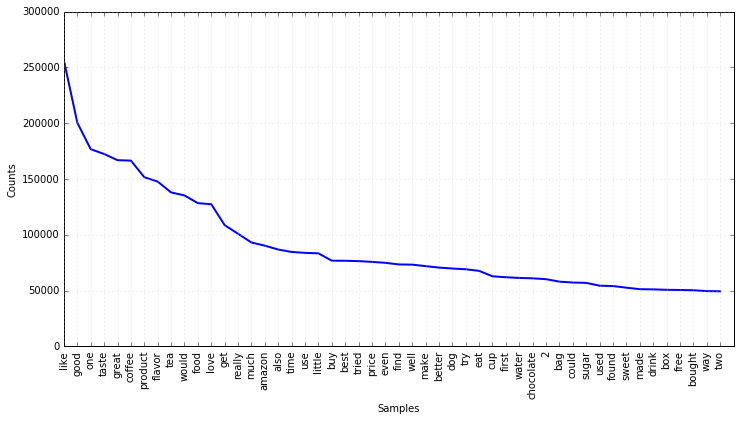

In [18]:
import matplotlib.pyplot as plt
fdist = nltk.FreqDist(Corpus_tokenizado)
plt.figure(figsize=(12,6))
fdist.plot(50)

In [19]:
len(fdist)

133763

En la celda anterior se crea un diccionario para el corpus, compuesto por cada una de las palabras presentes en él asociada a la frecuencia de cada una de ellas. Así entonces, se obtiene un vocabulario de 133763 palabras para el preprocesamiento realizado. Además de esto se puede visualizar un gráfico representando a este diccionario, donde se ve una clara ley de Zipf, es decir, ley de mínimo esfuerzo, pocas palabras que se repiten muchas veces y hartas palabras que se repiten poco, lo cual indica una poca diversidad del lenguaje.

In [22]:
dic = {}
for token in Corpus_tokenizado:
    if token not in dic:
        dic[token] = 1
    else:
        dic[token]+=1

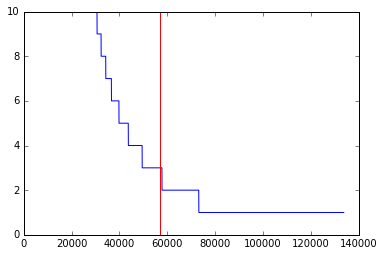

In [23]:
aux = sorted(dic.values(),reverse=True)
import matplotlib.pyplot as plt
plt.plot(range(len(aux)), aux)
plt.axvline(57000,c='r')
plt.ylim(0,10)
plt.show()

El gráfico anterior es nuestro argumento para definir el umbral de frecuencia mínima de palabras, el eje *x* representa a las palabras en el vocabulario, el eje *y* representa la frecuencia de cada una. El umbral es de 3 palabras, es decir, las palabras que se repiten dos o menos veces son eliminadas. Así, desde la línea vertical roja hacia la derecha son eliminadas, dejando aproximadamente 60000 palabras en el diccionario de las 130000 iniciales. Por lo tanto, el vocabulario se ve disminuido en un 50%.

In [40]:
#extraer palabras que seran eliminadas
a_eliminar = []
for palabra in dic:
    if dic[palabra] < 3:
        a_eliminar.append(palabra)
print len(a_eliminar)

76016


Se seleccionan las palabras a ser eliminadas, las cuales son 76016 del diccionario completo, lo que se traduce a una mayor cantidad de palabras a eliminar sobre el Corpus completo. Estas son las palabras que aparecen una vez en todo el corpus o dos veces, es decir, palabras poco frecuentes y utilizadas por los usuarios que realizan las críticas, por lo que podrían ser consideradas como *ruido*, palabras únicas del contexto u otro factor, por ejemplo nombres de lugares o personas.  
En la siguiente celda las palabras seleccionadas son eliminadas de todo el Corpus.

In [24]:
nuevo_Corpus = [] #corpus de tokens de todo el texto preprocesado
for token in Corpus_tokenizado:
    if dic[token] >= 3: #umbral
        nuevo_Corpus.append(token)
print len(nuevo_Corpus)

22794889


##### Bigramas

In [31]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

#bigram (collocation) aplicado sobre el corpus completo (preprocesado y tokenizado)
finder = BigramCollocationFinder.from_words(nuevo_Corpus)
print finder.nbest(bigram_measures.pmi, 30) 

[(u'katharena', u'eiermann'), (u'chupa', u'chups'), (u'uva', u'ursi'), (u'nooks', u'crannies'), (u'030', u'268'), (u'gia', u'russa'), (u'hund', u'flocken'), (u'pau', u'arco'), (u'harris', u'teeter'), (u'pepto', u'bismol'), (u'dinty', u'moore'), (u'joanne', u'tobacman'), (u'mehmet', u'efendi'), (u'whisker', u'lickins'), (u'chiou', u'toxicology'), (u'kum', u'kee'), (u'highlander', u'grogg'), (u'jules', u'destrooper'), (u'danny', u'elfman'), (u'liv', u'littles'), (u'aspergillus', u'oryzae'), (u'bertie', u'botts'), (u'bonne', u'maman'), (u'bok', u'choy'), (u'shar', u'pei'), (u'coton', u'tulear'), (u'dong', u'quai'), (u'enterococcus', u'faecium'), (u'bacillus', u'subtilis'), (u'yama', u'moto')]


En la celda anterior se muestran las top 30 collocation (bigramas) del corpus completo. Estos son los pares de palabras que más se repiten, en general son palabras que tienen un significado particular sólo si están ambas juntas su filosofía va con "el todo es más que la suma de las partes individuales". Analizando los bigramas de este corpus, nos encontramos con nombres de marcas de comida tal como *jules destrooper*, *chupa chups*, *mehmet efendi*, entre otros. Un par de nombres de personas como *katharena eiermann*, *joanne tobacman*, bacterias como *bacillus subtilis*, *enterococcus faecium*.  
Se puede ver que la gran parte de estas al ser nombres, corresponden a sustantivos. Donde por el dominio del dataset (*Amazon food*) son relacionadas al ámbito culinario.

##### Taggers

In [37]:
#crear token de sentencia
from nltk.tokenize import sent_tokenize

sentencias = []
for review in Reviews[:50000]: #para cada critica (sentencia) del corpus
    #eliminan los tag html de la critica
    review_procesada = BeautifulSoup(review).text   
    
    #elimina los simbolos excepto alfanumerico o simbolo de puntuacion
    review_procesada = re.sub(r'[^\w.]', ' ', review_procesada)
    
    sent_review = sent_tokenize(review_procesada.decode('utf-8','ignore')) #se tokeniza en base a sentencia (frase)
    sentencias+=sent_review
    
print sentencias[:10]

[u'I have bought several of the Vitality canned dog food products and have found them all to be of good quality.', u'The product looks more like a stew than a processed meat and it smells better.', u'My Labrador is finicky and she appreciates this product better than  most.', u'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted.', u'Not sure if this was an error or if the vendor intended to represent the product as  Jumbo .', u'This is a confection that has been around a few centuries.', u'It is a light  pillowy citrus gelatin with nuts   in this case Filberts.', u'And it is cut into tiny squares and then liberally coated with powdered sugar.', u'And it is a tiny mouthful of heaven.', u'Not too chewy  and very flavorful.']


Los puntos en el corpus son necesarios para separar cada crítica por sentencia o frase, ya que cada crítica podría poseer múltiples frases por separado, esto es solo para el análisis del tagger debido a que este trabaja con cadenas de markov, donde cada palabra es condicionada por la anterior.

Para la actividad se selecciona una pequeña fracción de todo el dataset (una muestra del 10%) para realizar los análisis de texto, lo cual no le quita relevancia ya que es una gran cantidad de datos. Esto es ya que en los computadores que se ejecutaron los códigos solo soportaban esta fracción.

In [38]:
from nltk.tag import StanfordPOSTagger
#agregar jar y modelo mediante la ruta de estos
#Postagger para version de java 7
jar = 'stanford-postagger-2014-08-27/stanford-postagger.jar'
model = 'stanford-postagger-2014-08-27/models/english-left3words-distsim.tagger'

pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

#para cada sentencia en el corpus
for sentencia in sentencias[:5]:
    print "Sentencia: "
    
    sentencia_tokenizada=nltk.word_tokenize(sentencia)
    
    tagged_text = pos_tagger.tag(sentencia_tokenizada)
    print tagged_text

Sentencia: 
[(u'I', u'PRP'), (u'have', u'VBP'), (u'bought', u'VBN'), (u'several', u'JJ'), (u'of', u'IN'), (u'the', u'DT'), (u'Vitality', u'NN'), (u'canned', u'VBD'), (u'dog', u'NN'), (u'food', u'NN'), (u'products', u'NNS'), (u'and', u'CC'), (u'have', u'VBP'), (u'found', u'VBN'), (u'them', u'PRP'), (u'all', u'DT'), (u'to', u'TO'), (u'be', u'VB'), (u'of', u'IN'), (u'good', u'JJ'), (u'quality', u'NN'), (u'.', u'.')]
Sentencia: 
[(u'The', u'DT'), (u'product', u'NN'), (u'looks', u'VBZ'), (u'more', u'JJR'), (u'like', u'IN'), (u'a', u'DT'), (u'stew', u'NN'), (u'than', u'IN'), (u'a', u'DT'), (u'processed', u'VBN'), (u'meat', u'NN'), (u'and', u'CC'), (u'it', u'PRP'), (u'smells', u'VBZ'), (u'better', u'JJR'), (u'.', u'.')]
Sentencia: 
[(u'My', u'PRP$'), (u'Labrador', u'NN'), (u'is', u'VBZ'), (u'finicky', u'JJ'), (u'and', u'CC'), (u'she', u'PRP'), (u'appreciates', u'VBZ'), (u'this', u'DT'), (u'product', u'NN'), (u'better', u'JJR'), (u'than', u'IN'), (u'most', u'JJS'), (u'.', u'.')]
Sentencia: 
[(

En la celda anterior se configura el POSTagger de Standford, implementado en la versión 7 de java el cual asigna *tags* a cada token de una sentencia perteneciente al corpus como se puede ver en la ejecución del código. En él se muestra un extracto de todas las sentencias para visualizar la asignación hecha.  
Dados los resultados, es posible notar que la asignación de cada **tag** a cada token es correcta para este extracto, lo cual se atribuye a la dependencia de cada palabra respecto a la anterior, determinando así la función que esta cumple en el texto. Es por esto que es necesario dejar las palabras que son stopwords, ya que estas cumplen un rol fundamental al momento de asignar el **tag**, debido a que si estas fueran eliminadas toda la asignación cambiaría debido a que la cadena sería otra, por lo que el contexto se vería afectado.

In [95]:
from nltk.tag import StanfordNERTagger

#se configura el tagger
jar = 'stanford-ner-2014-08-27/stanford-ner.jar'
model = 'stanford-ner-2014-08-27/classifiers/english.all.3class.distsim.crf.ser.gz'
ner_tagger = StanfordNERTagger(model,jar,encoding='utf-8')

#para cada sentencia en el corpus
for sentencia in sentencias[65:75]:
    print "Sentencia: "
    
    sentencia_tokenizada=nltk.word_tokenize(sentencia)
    
    tagged_text = ner_tagger.tag(sentencia_tokenizada)
    print tagged_text

Sentencia: 
[(u'In', u'O'), (u'the', u'O'), (u'worst', u'O'), (u'of', u'O'), (u'times', u'O'), (u'they', u'O'), (u'sniff', u'O'), (u'and', u'O'), (u'eat', u'O'), (u'this', u'O'), (u'and', u'O'), (u'get', u'O'), (u'through', u'O'), (u'the', u'O'), (u'cold', u'O'), (u'and', u'O'), (u'fight', u'O'), (u'to', u'O'), (u'keep', u'O'), (u'their', u'O'), (u'territory', u'O'), (u'...', u'O'), (u'I', u'O'), (u'love', u'O'), (u'my', u'O'), (u'TNR', u'O'), (u'program', u'O'), (u'I', u'O'), (u'donated', u'O'), (u'to', u'O'), (u'Denver', u'LOCATION'), (u'for', u'O'), (u'wonderful', u'O'), (u'reasons', u'O'), (u'.', u'O')]
Sentencia: 
[(u'We', u'O'), (u'elders', u'O'), (u'must', u'O'), (u'set', u'O'), (u'a', u'O'), (u'example..Thank', u'O'), (u'You', u'O'), (u'Amazon', u'LOCATION'), (u'and', u'O'), (u'all', u'O'), (u'the', u'O'), (u'stores', u'O'), (u'and', u'O'), (u'fast', u'O'), (u'delivery', u'O'), (u'bundling', u'O'), (u'and', u'O'), (u'easy', u'O'), (u'open', u'O'), (u'packaging..', u'O')]
Senten

En la celda anterior se presenta un extracto de todas las sentencias presentes en el corpus, ya que muchas de éstas no poseen entidades por lo que el tagger solo las asigna como **O** lo cual significa *other*.  
En cambio, otras sentencias presentan entidades de lugares como Denver, Amazon (Amazonas) y de personas como "Monin". Para el caso de la palabra Amazon, la cual es considerada un lugar en base al *Nertagger*, se puede ver que en base al contexto se refiere a las tiendas de las franquicia, por lo que el *tagger* tiene ciertos errores debido a la polisemia de las palabras.  

Los términos detectados están predefinidos por este tagger, lo que explica que se reconozca "Monin" como una persona y no "Rose", que también está presente en algunas sentencias pero no es detectada como una entidad. Esto es debido al mismo análisis del *Postagger*, ya que al ser una cadena de markov, esta depende del contexto anterior que se genere.

## Sentiment Analysis

A partir de las reseñas incluidas en el dataset original (*Reviews.csv*) se procesan a continuación, tal cual se hizo anteriormente para el corpus, cada una de las reseñas incluidas en él a fin de determinar y analizar la polaridad de cada una. Para ello se utilizrá la librería Vader incorporada en NLTK. 


### Preprocesamiento

In [45]:
stoplist = stopwords.words('english')

Reviews = Reviews.sample(5000)

Documento = []
for review in Reviews: #por cada reseña (sentencia)
    #hacer preprocesamiento y guardar en nueva lista
    
    #se eliminan los tag html y se pasa a minusculas
    soup = BeautifulSoup(review)
    critica = soup.get_text().lower()
    
    #se tokeniza
    tokens=nltk.word_tokenize(critica)

    #se eliminan stopwords
    critica = ""
    for token in tokens:
        if token not in stoplist:
            critica += token+" "
            
    #elimina todo los simbolos que no sean alfanumericos
    nueva_critica = re.sub(r'[^\w]', r' ', critica)
            
    #elimina palabras que tengan largo 2 o menos
    nueva_critica =  re.sub(r'\b[a-z]\b', r' ', nueva_critica)
    nueva_critica =  re.sub(r'\b[a-z][a-z]\b', r' ', nueva_critica)
    
    #se tokeniza
    tokens=nltk.word_tokenize(nueva_critica)
    
    #se eliminan las palabras con frecuencia menor a 3 en todo el corpus
    final = ""
    for token in tokens:
        if fdist[token] >=3 :#token not in a_eliminar (mas lento)
            final += token + " "
                
    Documento.append(final)
print len(Documento)

5000


Se selecciona una muestra de 1% del dataset completo para realizar esta sección debido a que no es de gran relevancia ejecutar sobre todo el dataset. Además se tenían problemas al ejecutar sobre el corpus completo, debido a las limitaciones de los recursos computacionales.

### Polaridad

El análisis de sentimiento es útil para una amplia gama de problemas que son de interés en diversos campos tales como la sociología, el marketing, la publicidad y otros. La naturaleza inherente del contenido de los posteos (o micro blogs) plantean desafíos a las aplicaciones prácticas del análisis del sentimiento debido al gran volumen de los contenidos que se pueden hallar en la web así como los diversos contextos.
Por ello, se procede a aplicar el método polarity_scores() a cada reseña disponible.

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def determinar_polaridad(D, n = 0):
    if n == 0: # mostrar todos los datos
        n = len(D)
        
    for i in range(n):
        sentencia_preprocesada = D[i]
        sentencia_original = Reviews.iloc[i]
        
        print "Sentencia original:"
        print sentencia_original
        print "Polaridad: ",sid.polarity_scores(sentencia_original)
        
        print "Sentencia preprocesada:"
        print sentencia_preprocesada
        print "Polaridad: ",sid.polarity_scores(sentencia_preprocesada)
        print ""
        
determinar_polaridad(Documento,20)

Sentencia original:
I srewed the top off the bottle without removing the hard plastic pull ring. Makes me wonder if it's safe to use. There is not other covering and I put the cap back on and it looks like it's never been opened! Since it's a powered supplement this doesnt look safe. I gave it a two because of the seal and the fact that I'll probably have to return it.
Polaridad:  {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.8654}
Sentencia preprocesada:
top bottle without removing hard plastic pull makes wonder safe use covering put cap back looks like never opened since powered supplement doesnt look safe gave two seal fact probably return 
Polaridad:  {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.8554}

Sentencia original:
I have tried to get rid of these buggers for over a year now. I have tried everything from chewing gum, insecticide for the grubs, flooding them with a garden hose ( I ran the hose down a main tunner for 8 hours before the water appeared out of 

La aplicación del método mencionado anteriormente, nos indica la connotación de la sentencia analizada, es decir, qué tan positiva, negativa o neutral es la posición del opinológo en cuanto al elemento en cuestión. 
VADER proporciona análisis léxico no-supervisado que se basa en un diccionario de palabras, lo que lo posiciona dentro de los métodos Opinion Words para Sentiment Analysis. A diferencia de otros métodos, VADER no requiere entrenamiento o tagger previo sino que ésto ya se ha implementado dentro de la libreria para poder hacer uso directo de sus funciones.  
Sabiendo esto, y  para poder analizar los resultados obtenidos, se presentan tanto la sentencia original como la sentencia procesada, a la que se le han eliminado los tags HTML, términos sin significado por sí solos o *stopwords*, palabras con frecuencia menor a 3 y está tokenizado, generando un texto no muy comprensible pues carece de coherencia.  
En varios casos, los retornos de la función indican una polaridad no muy alineada a lo que un ser humano dictaría al leer la reseña. Aún así, los resultados no son muy alejados. El método reconoce correctamente aquellas palabras que comunmente se considerarían negativas (*problem*, *garbage*, *trash*, *etc*) y aquellas que se considerarían positivas (*good*, *best*, *pleasant*, *etc*) lo cual permite ponderar y entregar la tendencia principal de las reseñas. Así entonces, es posible notar que algoritmos como VADER (Opinion Words) necesitan de otras técnicas para permitir una mayor precisión en sus resultados. Por ejemplo: considerar aquellas palabras que los usuarios de internet han escrito mal, de forma abreviada o incluso aquellos términos que han ganado significado en una sociedad moderna (emoticonos, siglas, entre otros).  

No es extraño encontrar casos donde en la reseña original y preprocesada tengan orientaciones contrapuestas. Una posible razón de este veredicto es que este es un analizador léxico de cada palabra individial, es decir, no considera el contexto en el cual está inmerso, entonces al reducir la cantidad de palabras de una reseña a otra, las palabras positivas/negativas adquieren una mayor ponderación sobre la sentencia completa.